In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [151]:
def normalize(depth_image):
    max = depth_image.max()
    ratio = 255/max
    result = depth_image * ratio
    return result.astype('uint8')

In [176]:
color_images = []
depth_images = []

for i in range(31):
    color_image = cv2.imread("color_frames/color_image" + str(700+i) + ".png", cv2.IMREAD_COLOR)
    color_images.append(color_image)

for j in range(31):
    depth_image = cv2.imread("depth_frames/depth_image" + str(429+j) + ".png", cv2.IMREAD_UNCHANGED)
    depth_images.append(depth_image)

    max = depth_image.max()
    ratio = 255/max
    depth_image_gray = depth_image * ratio
    cv2.imwrite("depth_frames_gray/depth_image_gray" + str(429+j) + ".png", depth_image_gray)
    
print(len(color_images))
print(len(depth_images))

31
31


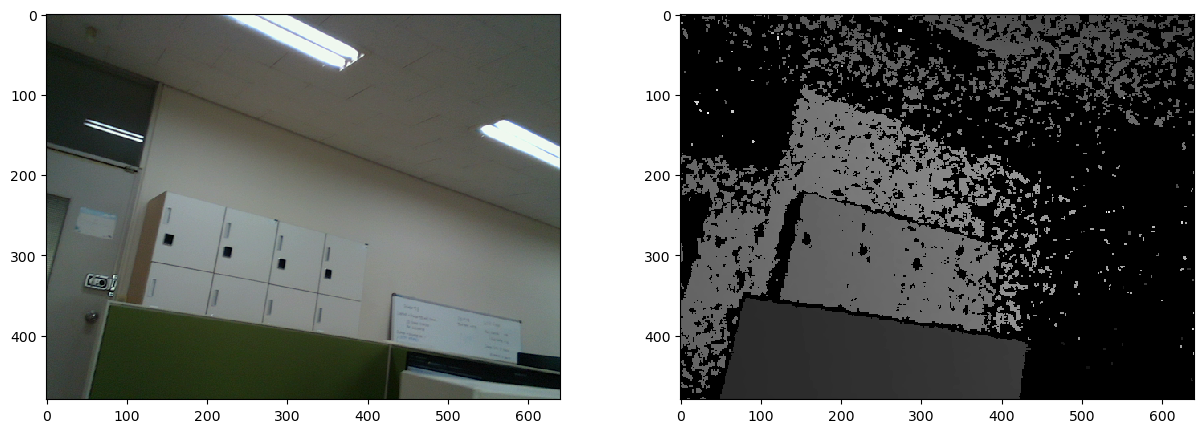

In [177]:
color_image = color_images[0]
depth_image = depth_images[0]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[1].imshow(depth_image, cmap='gray')
plt.show()


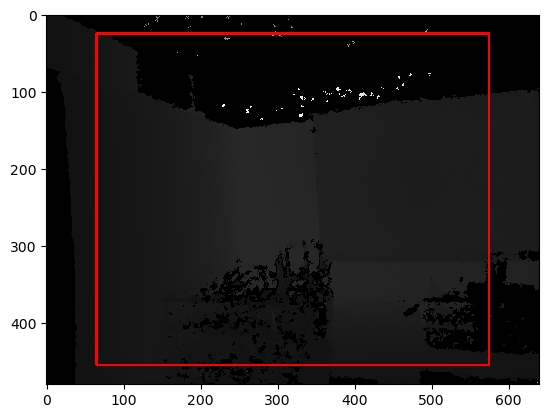

(65, 25) (575, 455)


In [143]:
center = (320, 240)
width = (510, 430)
top_left = (center[0] - width[0]//2, center[1] - width[1]//2)
bottom_right = (center[0] + width[0]//2, center[1] + width[1]//2)


depth_image_C3 = cv2.cvtColor(depth_image, cv2.COLOR_GRAY2RGB)
depth_image_C3 = normalize(depth_image_C3)
depth_roi = cv2.rectangle(depth_image_C3, top_left, bottom_right, (255, 0, 0), 2)

plt.imshow(depth_roi)
plt.show()

print(top_left, bottom_right)

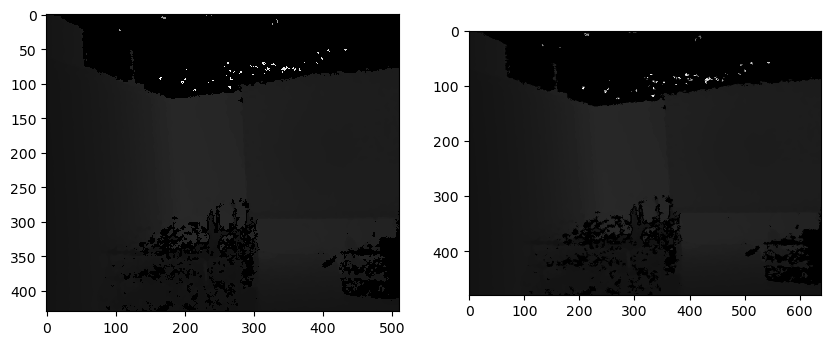

In [144]:
cropped_depth_image = depth_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
resized_depth_image = cv2.resize(cropped_depth_image, dsize=(640, 480))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cropped_depth_image, cmap='gray')
axs[1].imshow(resized_depth_image, cmap='gray')
plt.show()

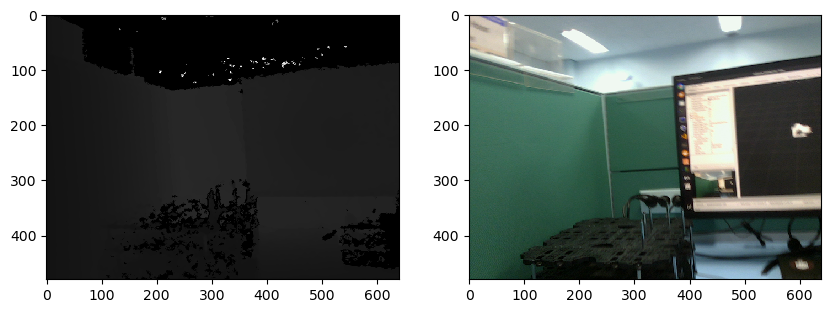

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(resized_depth_image, cmap='gray')
axs[1].imshow(color_image)
plt.show()

In [167]:
def get_right_image(color_image, depth_image):
    # Basic information
    focal_length = 604  # f_x = 603.838, f_y = 604.019
    baseline = 10  # 10mm
    right_image = np.zeros_like(color_image)

    # Calculate the right image
    for row in range(480):
        for col in range(640):
            depth = depth_image[row, col]  # mm
            if depth:
                disparity = focal_length * baseline // depth
                
                if (col - disparity > 0):
                    right_image[row, col - disparity] = color_image[row, col]
    return right_image

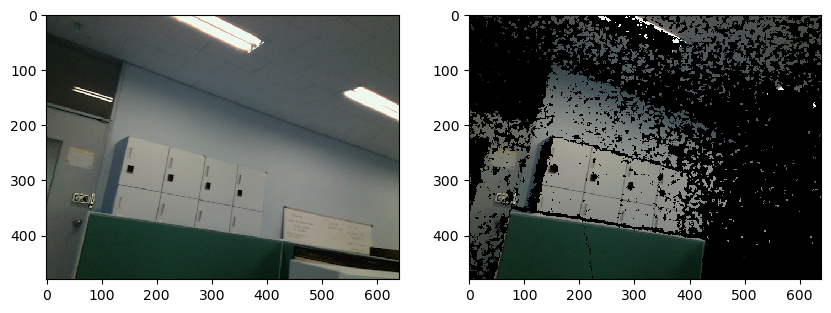

In [178]:
right_image = get_right_image(color_image, depth_image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(color_image)
axs[1].imshow(right_image)
plt.show()

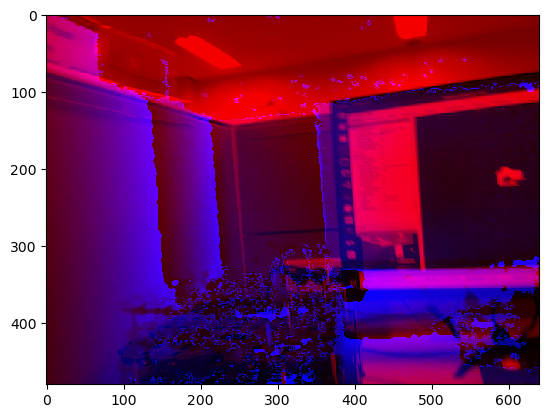

In [149]:
compare_image = np.zeros_like(color_image)
compare_image[:,:,0] = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
compare_image[:,:,2] = resized_depth_image

plt.imshow(compare_image)
plt.show()